# Pasajeros metrorrey

**Estadística Aplicada**

**Edwin Javier Hernández Rodríguez**

**Sesion 16- 28 Marzo 2023**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#librerias especializadas
from statsmodels.tsa.api import seasonal_decompose

In [3]:
# datos

metrorrey = pd.read_csv('metrorrey.csv')

In [5]:
metrorrey.head()

,Fecha,Pasajeros(miles),Ingresos(miles)
0,2008/01,5869.0,16979.0
1,2008/02,6499.0,18516.0
2,2008/03,5801.0,16719.0
3,2008/04,6932.0,17663.0
4,2008/05,6876.0,21079.0


**Siempre que trabajemos con series de tiempo debemos declarar una variable como tiempo y convertirla en index**

In [7]:
#convertir la variable fecha en 'datetime' con pandas
metrorrey['Fecha'] = pd.to_datetime(metrorrey['Fecha'], format = '%Y/%m') # "Y" es para 2023, "y" es para 23

In [8]:
#convertir a la variable fecha en el index
metrorrey = metrorrey.set_index('Fecha')

In [9]:
metrorrey.index #debería decir formato mensual

DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01',
               ...
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01', '2023-01-01'],
              dtype='datetime64[ns]', name='Fecha', length=181, freq=None)

In [10]:
# darle formato mensual al index
# Monthly Series 'MS'
metrorrey.index.freq = 'MS'

In [11]:
metrorrey.index

DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01',
               ...
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01', '2023-01-01'],
              dtype='datetime64[ns]', name='Fecha', length=181, freq='MS')

**Si el dataframe ya tiene variable de fecha, este ya es el index y hay una frecuencia (de tiempo) definida, ya se pueden usar las herramientas de análisis de series de tiempo**

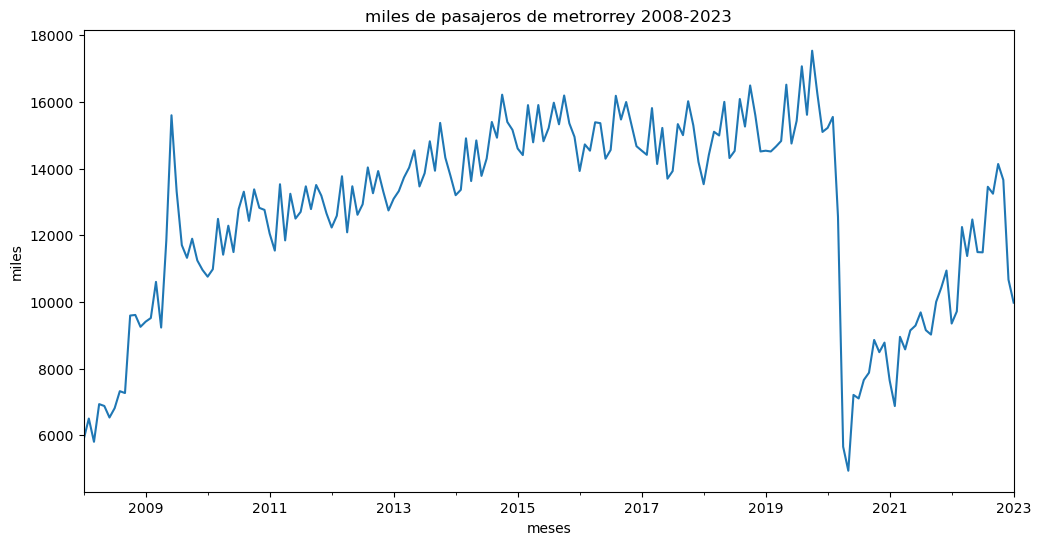

In [13]:
#Ahora toca graficar
#metrorrey.columns
metrorrey['Pasajeros(miles)'].plot(figsize=(12,6))
plt.title('miles de pasajeros de metrorrey 2008-2023')
plt.ylabel('miles')
plt.xlabel('meses')
plt.show()

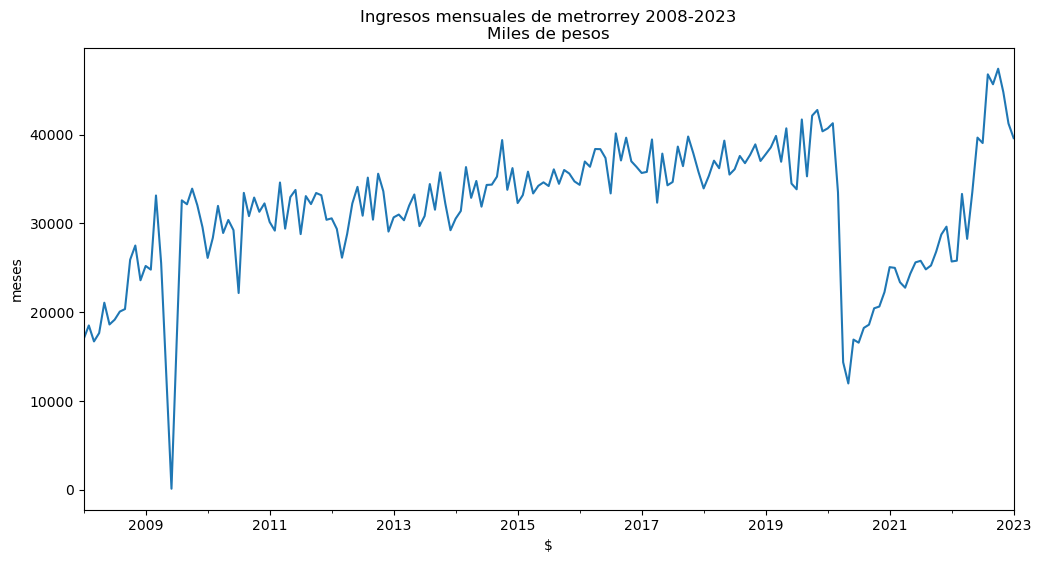

In [14]:
metrorrey['Ingresos(miles)'].plot(figsize=(12,6))
plt.title('Ingresos mensuales de metrorrey 2008-2023\nMiles de pesos')
plt.ylabel('meses')
plt.xlabel('$')
plt.show()

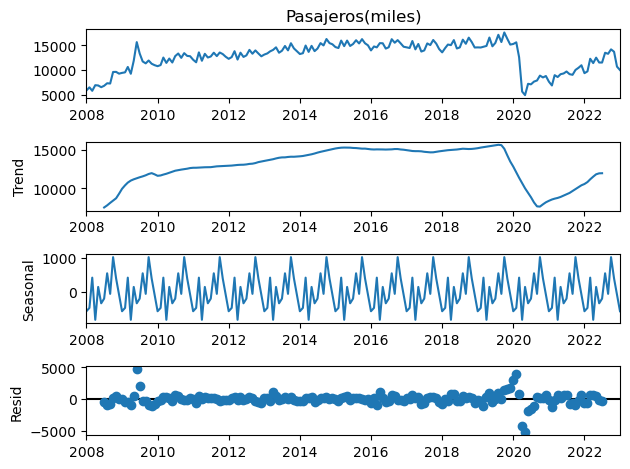

In [16]:
serie1 = seasonal_decompose(metrorrey['Pasajeros(miles)'], model='ad')
serie1.plot()
plt.show()
# Trend es la tendencia-ciclo

In [17]:
#vamos a ver el componente estacional
serie1.seasonal.iloc[0:12].sort_ #.iloc es como un select de R

Fecha
2008-01-01    -565.338211
2008-02-01    -467.710291
2008-03-01     417.269947
2008-04-01    -815.748883
2008-05-01     145.240614
2008-06-01    -332.910830
2008-07-01    -196.040026
2008-08-01     544.016519
2008-09-01     -56.829133
2008-10-01    1016.647513
2008-11-01     392.821051
2008-12-01     -81.418270
Freq: MS, Name: seasonal, dtype: float64

In [18]:
#los meses que hay mas pasajeros en metrorrey: Octubre y agosto (son los positivos)
#los meses que hay menos pasajeros en metrorrey (son los negativos)
metrorrey['pas_desestacionalizado'] = metrorrey['Pasajeros(miles)']-serie1.seasonal

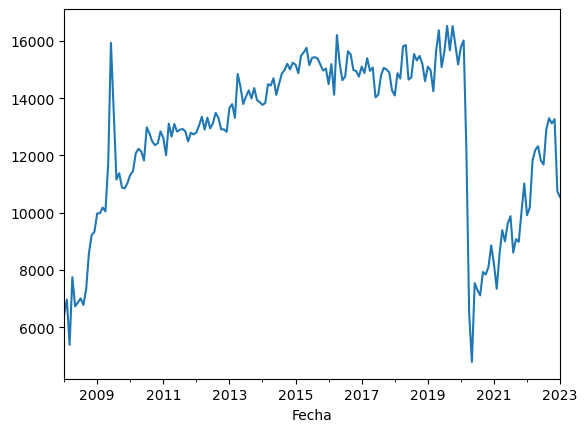

In [20]:
metrorrey['pas_desestacionalizado'].plot();